<a href="https://colab.research.google.com/github/Prathyusha-Pasupuleti/Internship/blob/main/CO2_Emissions_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
# Mount Google Drive to access files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define CSV file path from Google Drive

path ='/content/drive/MyDrive/CO2.csv'

In [ ]:
# Load the data from the file into a pandas DataFrame

df=pd.read_csv(path)

In [ ]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
# Get DataFrame dimensions

df.shape

(7385, 12)

In [ ]:
# Get DataFrame Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
# Calculate Summary statistics

df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
# Display first 10 rows

df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
# Display last 10 rows

df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7375,VOLVO,S90 T6 AWD,MID-SIZE,2.0,4,AS8,Z,11.3,7.5,9.6,29,223
7376,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4,AS8,Z,10.5,7.1,8.9,32,208
7377,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,11.0,7.4,9.4,30,219
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [ ]:
# Count Missing Values

display (df.isnull().sum())

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [ ]:
# Filtering DataFrame
FD = df[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
FD.head(10)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


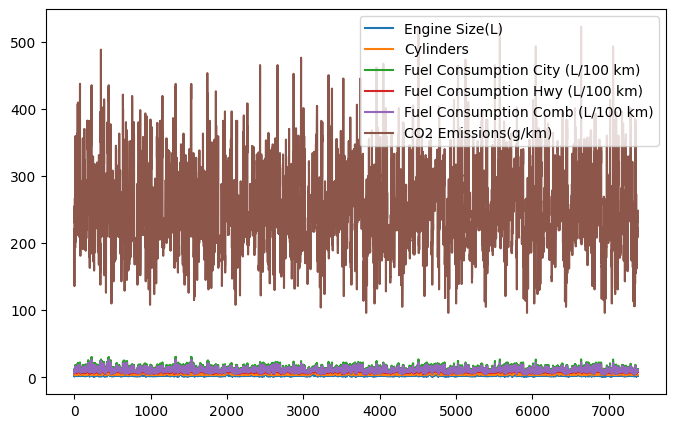

In [ ]:
# Plot the Data

plots = FD.plot(figsize=(8,5))

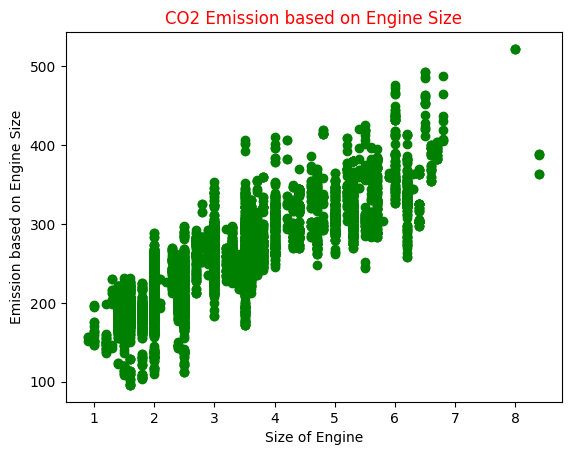

In [ ]:
# Create a Scatter plot

plt.scatter(FD['Engine Size(L)'], FD['CO2 Emissions(g/km)'], color='green')
plt.xlabel('Size of Engine')
plt.ylabel("Emission based on Engine Size")
plt.title('CO2 Emission based on Engine Size' , color='red')
plt.show()

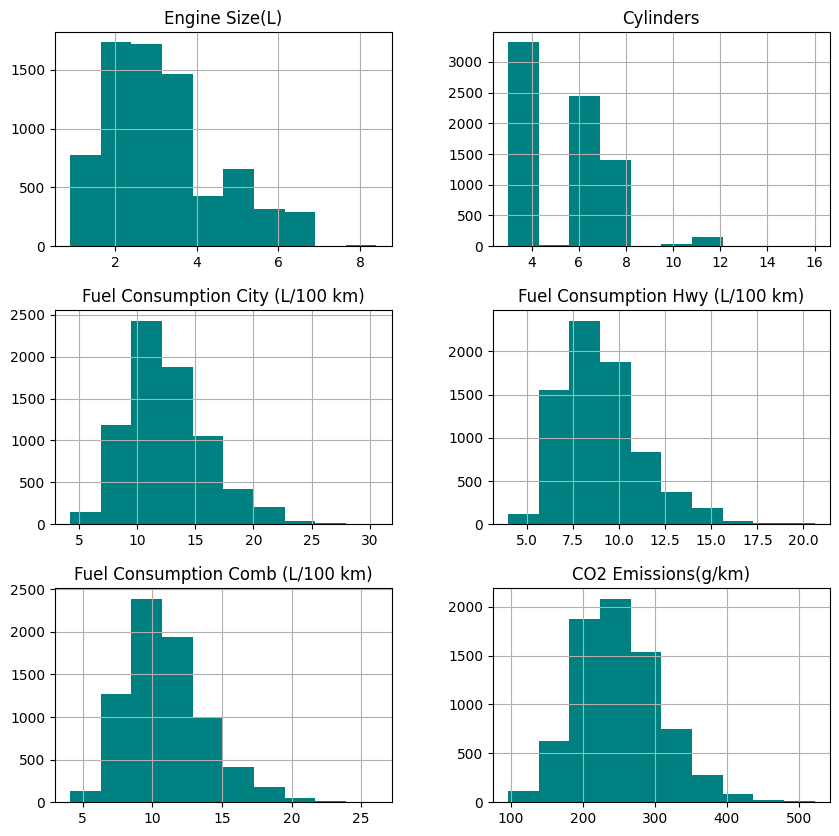

In [ ]:
# Plot a histogram with 10 bins

histogram = FD.hist(bins=10,figsize=(10,10),color=['teal'])

<ipython-input-97-a03b536357e4>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


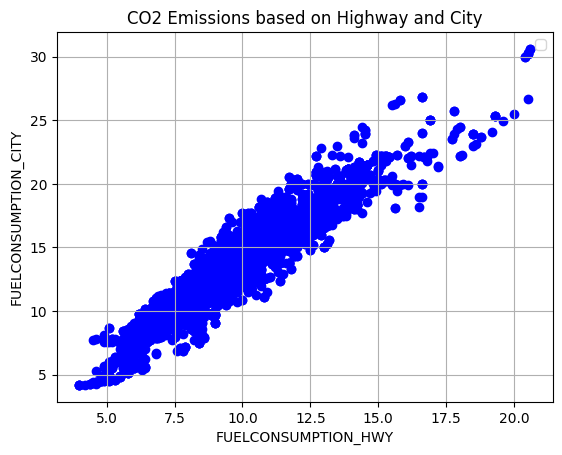

In [ ]:
# Create a Scatter plot

plt.scatter(FD['Fuel Consumption Hwy (L/100 km)'], FD['Fuel Consumption City (L/100 km)'], color='blue')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("FUELCONSUMPTION_CITY")
plt.legend()
plt.grid()
plt.title('CO2 Emissions based on Highway and City')
plt.show()

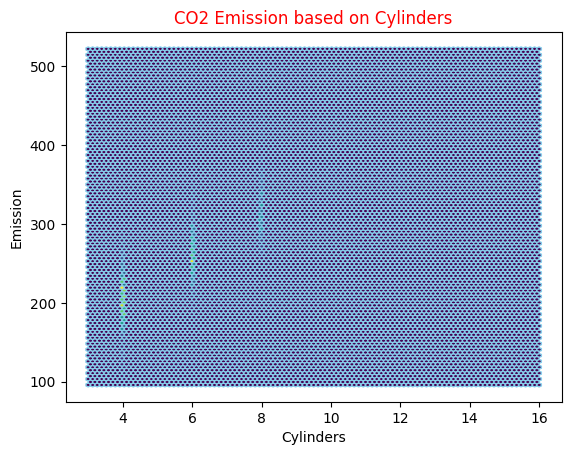

In [ ]:
# Create a Hexbin plot

plt.hexbin(FD['Cylinders'], FD['CO2 Emissions(g/km)'], color='skyblue')
plt.xlabel('Cylinders')
plt.ylabel("Emission")
plt.title('CO2 Emission based on Cylinders' , color='red')
plt.show()

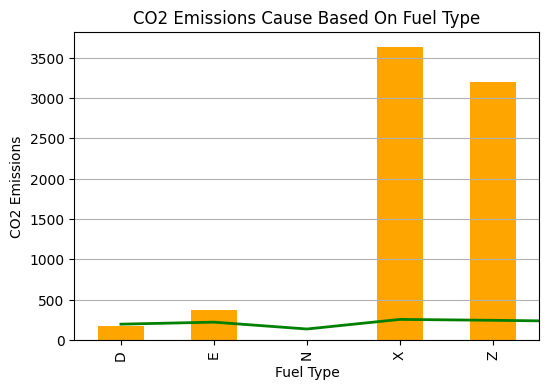

In [ ]:
# Create BarChart for fuel type counts and line plot for CO2 Emission

plt.figure(figsize=(6,4))
df['Fuel Type'].value_counts().sort_index().plot(kind='bar',color='orange')
plt.plot(df['CO2 Emissions(g/km)'],color='green',linewidth=2)
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Cause Based On Fuel Type')
plt.grid(True, axis='y')
plt.show()

<ipython-input-99-49793745cad5>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, ' CO2 Emissions based on Engine Size and Cylinder')

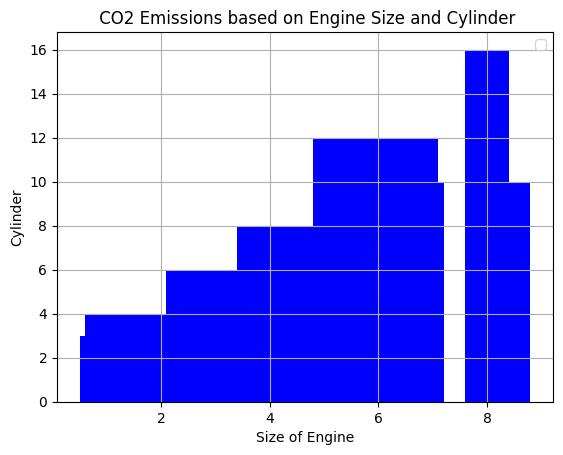

In [ ]:
# Create a Bar Plot

plt.bar(df['Engine Size(L)'],df['Cylinders'], color='blue')
plt.xlabel('Size of Engine')
plt.ylabel('Cylinder')
plt.legend()
plt.grid()
plt.title(' CO2 Emissions based on Engine Size and Cylinder')

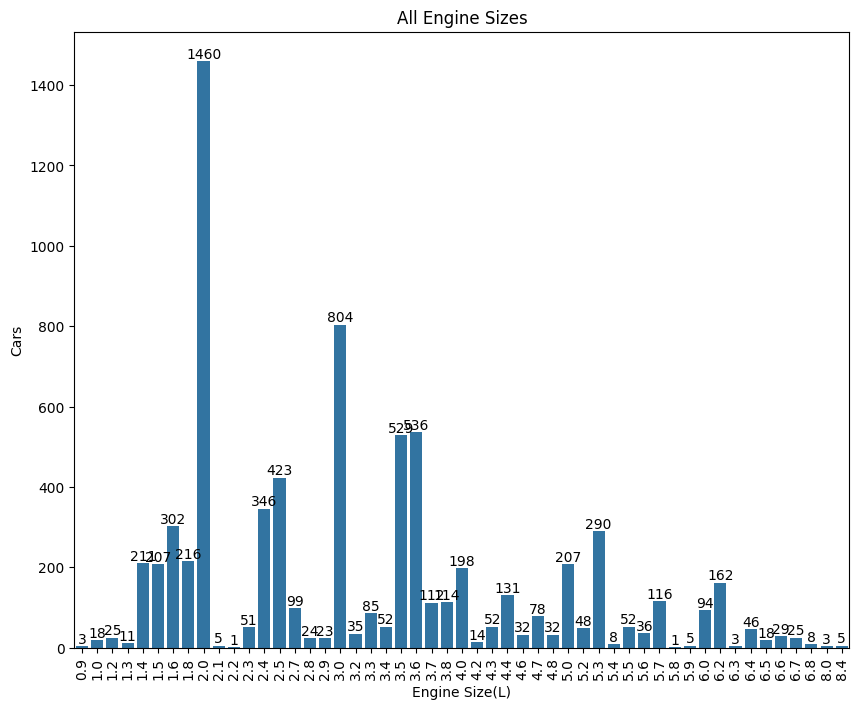

In [ ]:
plt.figure(figsize=(10,8))
Df = sns.countplot(x = "Engine Size(L)", data = df) # Assuming your dataframe is named 'df'
plt.xticks(rotation = 90)
plt.title("All Engine Sizes")
plt.xlabel("Engine Size(L)")
plt.ylabel("Cars")
plt.bar_label(figure4.containers[0])
plt.show()

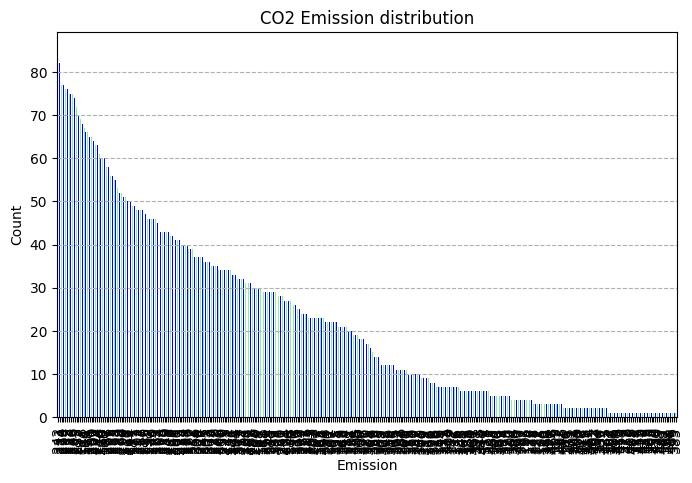

In [ ]:
plt.figure(figsize=(8,5))
df['CO2 Emissions(g/km)'].value_counts().plot(kind='bar',color=['lightgreen','blue'])
plt.xlabel('Emission')
plt.ylabel('Count')
plt.title('CO2 Emission distribution')
plt.grid(True ,axis='y' ,linestyle='--')
plt.show()

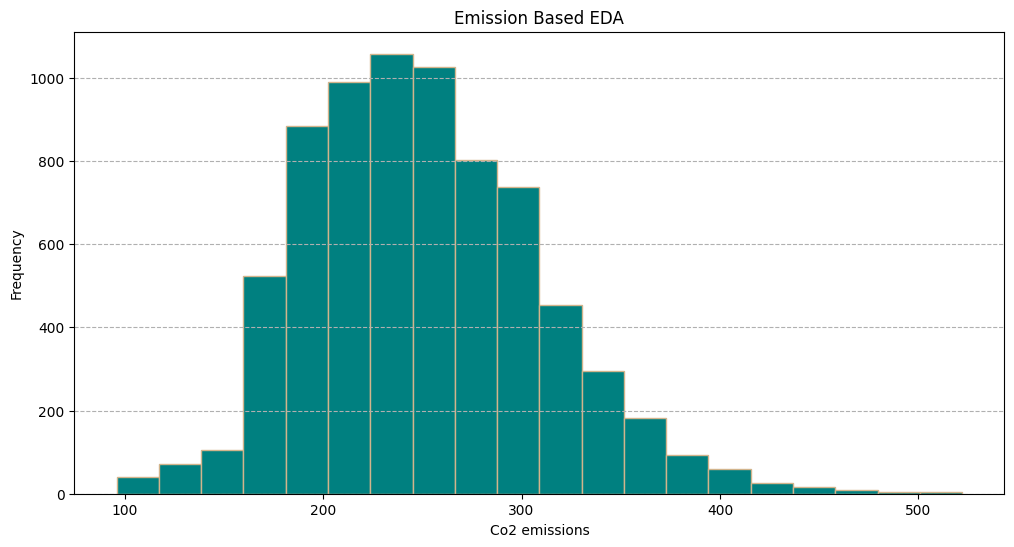

In [ ]:
# Create a Histogram Plot
#CO2 Emissions based on EDA

plt.figure(figsize=(12,6))
plt.hist(df['CO2 Emissions(g/km)'],bins = 20, color = 'teal', edgecolor='tan')
plt.xlabel('Co2 emissions')
plt.ylabel('Frequency')
plt.title('Emission Based EDA')
plt.grid(True, axis='y' ,linestyle='--')
plt.show()

In [ ]:
#CO2 Emissions variation with Fuel Type
df_co2_fuel_type = df.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

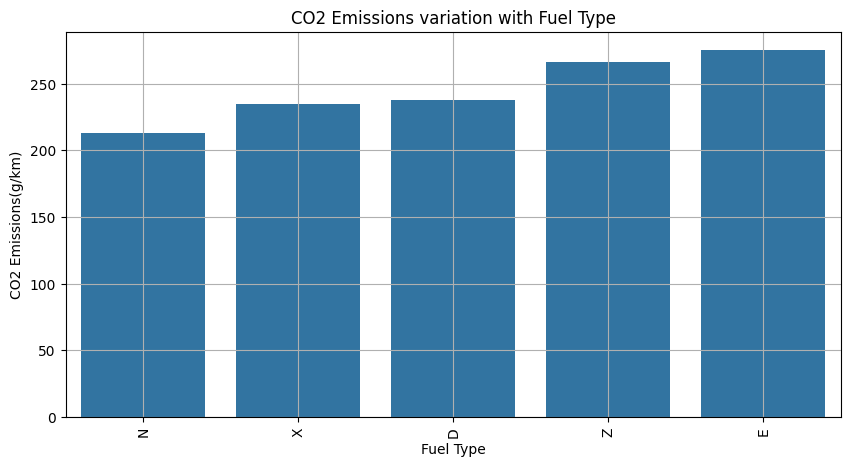

In [ ]:
plt.figure(figsize=(10,5))
df= sns.barplot(data = df_co2_fuel_type, x = "Fuel Type",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions(g/km)")
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

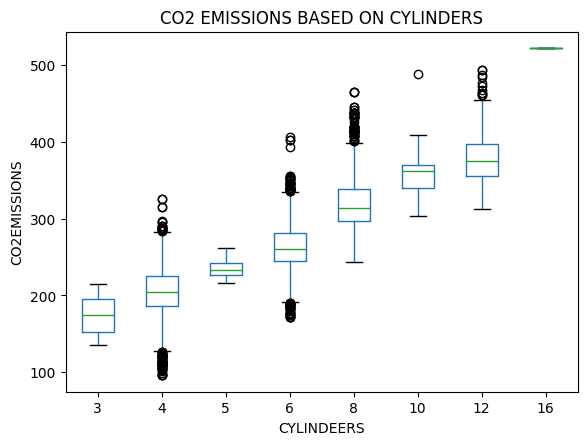

In [ ]:
# Create a Box Plot

plt.figure(figsize=(8,5))
df.boxplot(column='CO2 Emissions(g/km)', by='Cylinders',grid=False)
plt.xlabel('CYLINDEERS')
plt.ylabel('CO2EMISSIONS')
plt.title('CO2 EMISSIONS BASED ON CYLINDERS')
plt.suptitle("")
plt.show()

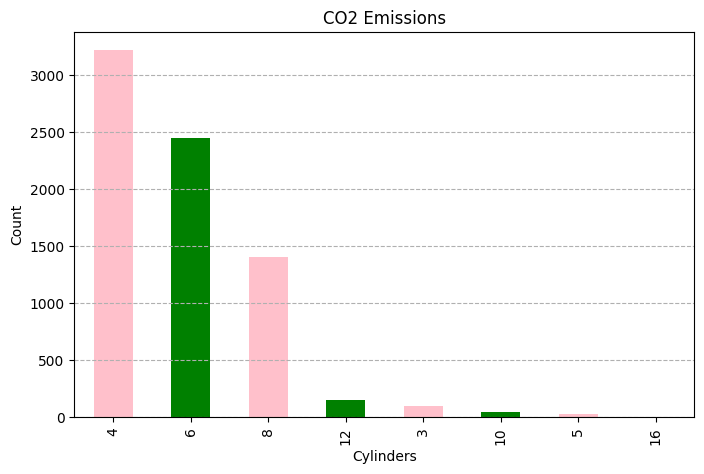

In [ ]:
# Create a Bar Plot On Cylinders Count

plt.figure(figsize=(8,5))
df['Cylinders'].value_counts().plot(kind='bar', color=['pink','green'])
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.title('CO2 Emissions')
plt.grid(True ,axis='y' ,linestyle='--')
plt.show()

In [ ]:
df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [ ]:
df_correlation = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
df_correlation.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [ ]:
df_check = df['Fuel Type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_check

,Fuel Type,Count
0,X,3637
1,Z,3202
2,E,370
3,D,175
4,N,1


In [ ]:
df_correlation.corr().T

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.817060,0.851145
Cylinders,0.927653,1.000000,0.780534,0.832644
Fuel Consumption Comb (L/100 km),0.817060,0.780534,1.000000,0.918052
CO2 Emissions(g/km),0.851145,0.832644,0.918052,1.000000


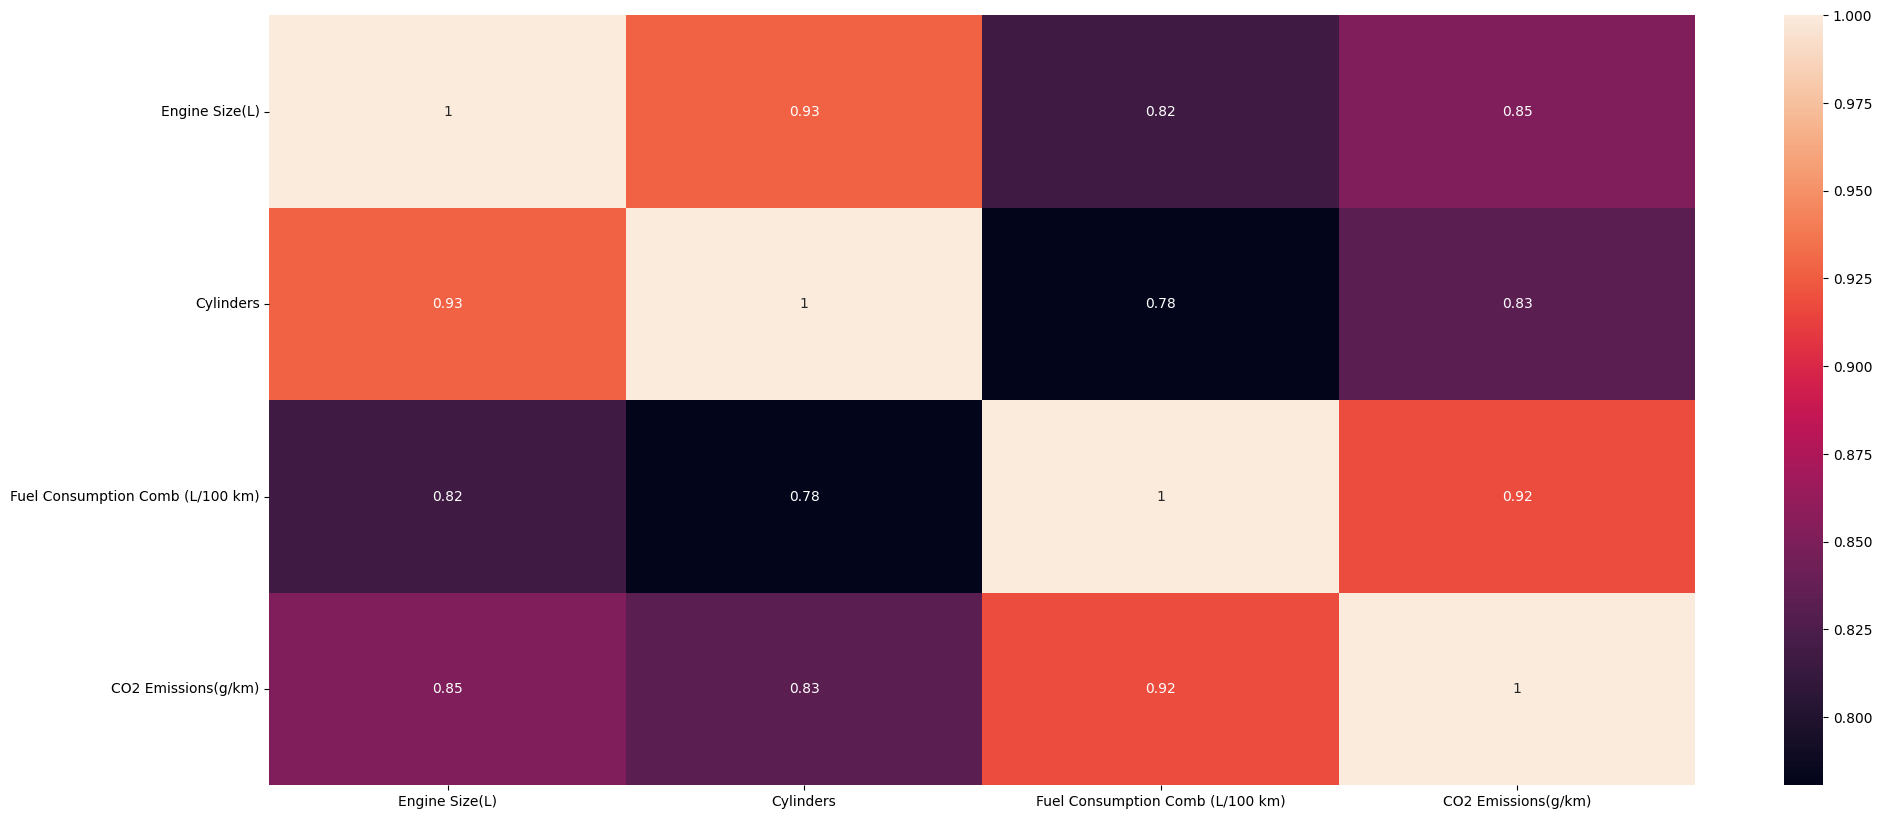

In [ ]:
plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(), annot = True)
plt.show()

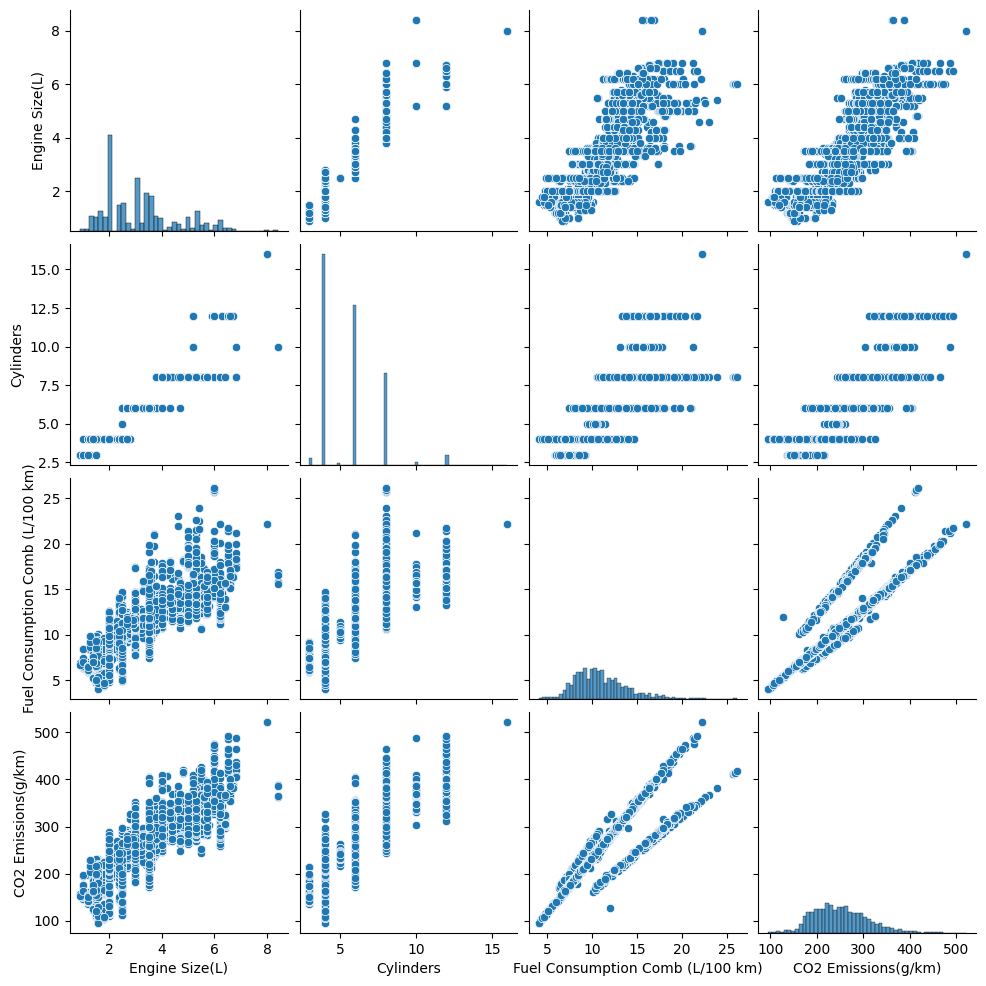

In [ ]:
sns.pairplot(df_correlation)

In [ ]:
# Import necessary libraries for data prepocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)']]
Y = df['CO2 Emissions(g/km)']

In [ ]:
# Split the dataset into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% for training
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Create an instance of the Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Import metrics to evaluate the model's performance
# Use the trained model to make predictions on the test data
# Calculate the Mean Errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squared Error : {MSE}')
print(f' Root Mean Absolute Error : {RMSE}')

Mean Absolute Error : 13.517321294682644
Mean Squared Error : 421.9223319051996
 Root Mean Absolute Error : 20.54074808533515


<ipython-input-105-84c4981c16d8>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'CO2 Emissions based on Cylinders')

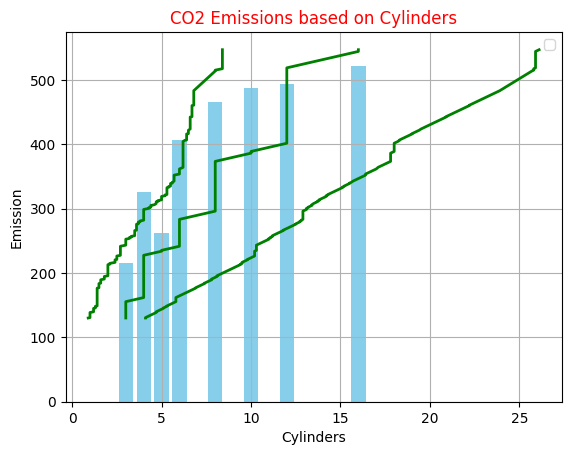

In [ ]:
plt.bar(FD['Cylinders'],FD['CO2 Emissions(g/km)'], color='skyblue')
plt.plot(XSorted,yPred, color='green', linewidth = 2)
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.legend()
plt.grid()
plt.title('CO2 Emissions based on Cylinders',color='red')

In [ ]:

# Sort the feature matrix X in ascending order along the 0th axis (rows)
XSoreted= np.sort(X,axis=0)

# Use the trained model to make predictions on the sorted feature matrix
y_pred = model.predict(XSoreted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Add a new column to the original DataFrame with the predicted CO2 values

feature_columns = ["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]
X = df[feature_columns]
predicted_co2 = model.predict(X)
df["Predicted_CO2"] = predicted_co2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save the DataFrame with predictions to a CSV file

output_file = "/content/drive/My Drive/co2_predictions.csv"
df.to_csv(output_file, index=False)
print(f"Predictions saved to: {output_file}")

Predictions saved to: /content/drive/My Drive/co2_predictions.csv


In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# Create a new DataFrame (df1) with a subset of columns from the original DataFrame (df)

df1 = df[["Engine Size(L)","Cylinders","Fuel Type","Fuel Consumption Comb (L/100 km)","CO2 Emissions(g/km)","Predicted_CO2"]]

In [ ]:
df1.head(10)

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Predicted_CO2
0,2.0,4,Z,8.5,196,201.040400
1,2.4,4,Z,9.6,221,217.875648
2,1.5,4,Z,5.9,136,163.740186
3,3.5,6,Z,11.1,255,256.696924
4,3.5,6,Z,10.6,244,250.061759
5,3.5,6,Z,10.0,230,242.099561
6,3.5,6,Z,10.1,232,243.426594
7,3.7,6,Z,11.1,255,257.815866
8,3.7,6,Z,11.6,267,264.451031
9,2.4,4,Z,9.2,212,212.567516


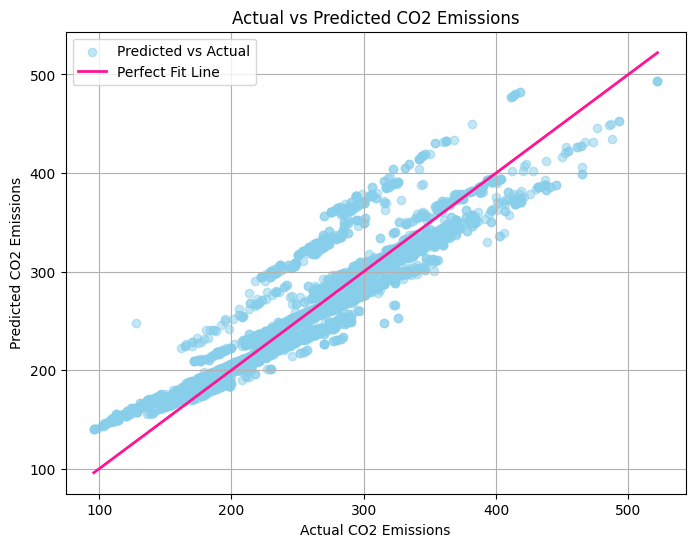

In [ ]:
#Predicted CO2 Emissions
# Scatter plot to visualize the relationship between actual and predicted CO2 emissions

plt.figure(figsize=(8, 6))
plt.scatter(df["CO2 Emissions(g/km)"], df["Predicted_CO2"], color='skyblue', alpha=0.5, label="Predicted vs Actual")
plt.plot([df["CO2 Emissions(g/km)"].min(),df["CO2 Emissions(g/km)"].max()],[df["CO2 Emissions(g/km)"].min(),df["CO2 Emissions(g/km)"].max()],
         color='deeppink', linewidth=2,label="Perfect Fit Line")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.legend()
plt.grid(True)
plt.show()

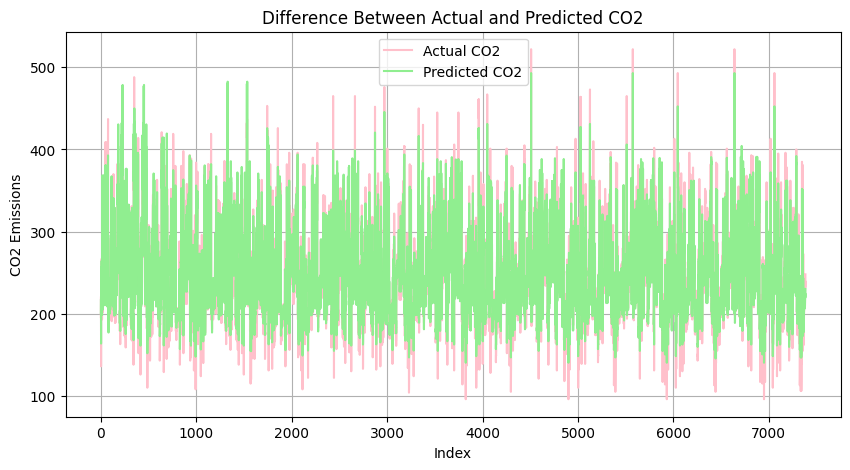

In [ ]:
# Difference Between Actual and Predicted CO2
plt.figure(figsize=(10, 5))
plt.plot(df["CO2 Emissions(g/km)"],label="Actual CO2",color='pink')
plt.plot(df["Predicted_CO2"], label="Predicted CO2", color='lightgreen')

plt.xlabel("Index")
plt.ylabel("CO2 Emissions")
plt.title("Difference Between Actual and Predicted CO2")
plt.legend()
plt.grid(True)
plt.show()